# Predicting home prices for Hass Consulting Company

## Defining the question: 
We work for Hass Consulting Company, a real estate expert with over 25 years of experience, as Data Scientists. We've been given the duty of researching the elements that influence housing prices utilizing data on real estate properties gathered over the last few months. 

Given the data, we are to create a machine learning model that predicts house prices based on the features given in the dataset provided.

## Metric for Success:
Accurately predicting real estate house prices for the company by evaluating our models using the RMSE and MSE of the models.

## Context:
House demand is increasing in the real estate business.Housing costs vary depending on a variety of factors such as location, property type, and living square footage. It would be beneficial for a Real Estate Company to understand how to decide which properties perform well in a market based on the elements that influence these pricing. This will allow them to price their homes appropriately and may also provide insight into how the properties' worth may increase in the future. Consumers would be able to access this data if they so desired.

## Experimental design taken:
- Read and explore the given dataset.
- Define the appropriateness of the available data to answer the given question.
- Find and deal with outliers, anomalies, and missing data within the dataset.
- Perform univariate, bivariate and multivariate analysis recording your observations.
- Performing regression analysis.


## Importing our libraries

In [1]:
# importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing libraries for machine modelling
# Importing some of the libraries we might use

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


# Setting the warnings that may appear in our modelling off
import warnings
warnings.filterwarnings('ignore')

# Setting the pandas warning for chained assignments off, the default is usually on.
pd.options.mode.chained_assignment = None

## Loading our dataset

In [2]:
# Loading our dataset
house = pd.read_csv("/content/Independent Project Week 7 - house_data.csv")
# viewing the top of our dataset
house.head() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Viewing the bottom of our dataset
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
# check the shape of our dataset
house.shape

## Our data has 21613 rows and 20 columns. This is a descent dataset to work with for model building.

(21613, 20)

In [5]:
# Checking the info of each column
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## Tidying our dataset

In [6]:
# dropping columns that will not be relevant to our analysis
house.drop(['id','lat','long'],axis= 1,inplace=True)
# view dataframe
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [7]:
# Checking unique values in each column
# Are there any unique values in each column entry in the dataset?
for i in house.columns:
 print(house[i].unique())
 print ("\n")

[221900. 538000. 180000. ... 541800. 610685. 402101.]


[ 3  2  4  5  1  6  7  0  8  9 11 10 33]


[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


[1180 2570  770 ... 3087 3118 1425]


[ 5650  7242 10000 ...  5813  2388  1076]


[1.  2.  1.5 3.  2.5 3.5]


[0 1]


[0 3 4 2 1]


[3 5 4 1 2]


[ 7  6  8 11  9  5 10 12  4  3 13  1]


[1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2190 2920 1460
 1170 1240 3140 2030 2310  700 1080 2520 2780 1560 1450 1720 2910 1620
 1360 2070 2460 1390 2140 1320 1340 1550  940 1380 3670 2370 1

In [8]:
# Checking for null values
house.isnull().sum()

## The dataset has no null values

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# Checking bathroom column unique values
house.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [10]:
# Converting the float values to integers
house['bathrooms'] = house['bathrooms'].astype(int)
house.bathrooms.unique()

array([1, 2, 3, 4, 0, 5, 6, 8, 7])

In [11]:
# Checking floor column unique values
house.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [12]:
# Converting the float values to integers
house['floors'] = house['floors'].astype(int)
house.floors.unique()

array([1, 2, 3])

In [13]:
# Checking for duplicated values
house.duplicated().sum()

6

In [14]:
# Viewing the duplicated columns 
house[house.duplicated()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
3951,550000.0,4,1,2410,8447,2,0,3,4,8,2060,350,1936,1980,98074,2520,14789
4352,259950.0,2,2,1070,649,2,0,0,3,9,720,350,2008,0,98106,1070,928
14983,585000.0,3,2,2290,5089,2,0,0,3,9,2290,0,2001,0,98006,2290,7984
20054,555000.0,3,2,1940,3211,2,0,0,3,8,1940,0,2009,0,98027,1880,3078
20524,529500.0,3,2,1410,905,3,0,0,3,9,1410,0,2014,0,98116,1510,1352
21474,359800.0,5,2,2170,2752,2,0,0,3,8,2170,0,2014,0,98106,1800,2752


In [15]:
# Dropping duplicates
#house.drop_duplicates(inplace= True)

# We could remove the duplicates, but we won't because they don't appear to be truly duplicated.

In [16]:
# Checking my dataframe 
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503


Our data appears to be clean. We can now conduct our exploratory analysis.

## Exploratory Analysis

### Univariate analysis

In [17]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  int64  
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  int64  
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(1), int64(16)
memory usage: 2.8 MB


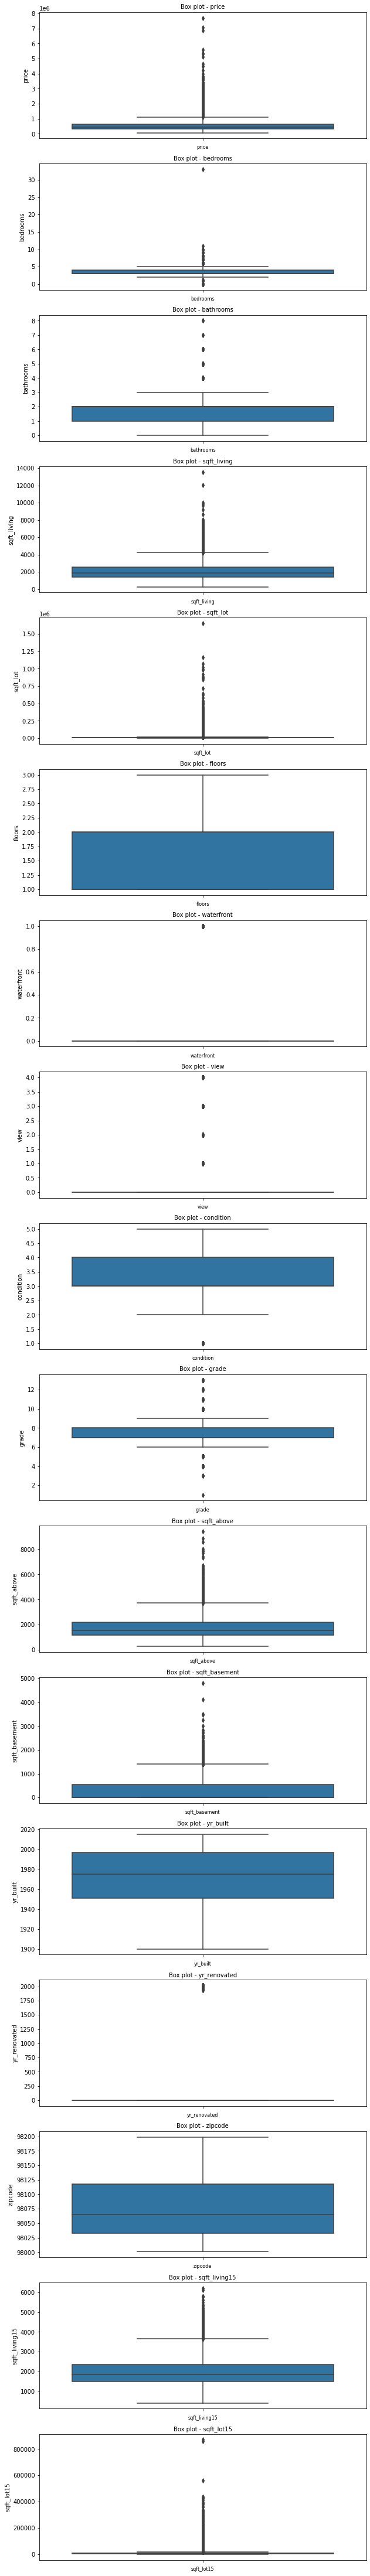

In [18]:
# plotting box plots for our variables to view if there are outliers
col_names = house.columns

fig, ax = plt.subplots(len(col_names), figsize= (10,80)) 

for i, col in enumerate(col_names):
  sns.boxplot(y = house[col], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col), fontsize= 10)
  ax[i].set_xlabel(col, fontsize= 8)
plt.show()

In [19]:
# Counting outliers
Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1

In [20]:
((house < (Q1 - 1.5 * IQR)) | (house > (Q3 + 1.5 * IQR))).sum()

price            1159
bedrooms          546
bathrooms         402
sqft_living       572
sqft_lot         2425
floors              0
waterfront        163
view             2124
condition          30
grade            1911
sqft_above        611
sqft_basement     496
yr_built            0
yr_renovated      914
zipcode             0
sqft_living15     544
sqft_lot15       2194
dtype: int64

Outliers exist in the columns price,bedrooms,bathrooms,sqft living and lot,grade,sqft above and basement, but we will not remove them because they could be viable entries.

Measures of central tendency

In [21]:
# Calculating mean of each columns
house.mean(axis = 0)

price            540182.158793
bedrooms              3.370842
bathrooms             1.749734
sqft_living        2079.899736
sqft_lot          15106.967566
floors                1.446213
waterfront            0.007542
view                  0.234303
condition             3.409430
grade                 7.656873
sqft_above         1788.390691
sqft_basement       291.509045
yr_built           1971.005136
yr_renovated         84.402258
zipcode           98077.939805
sqft_living15      1986.552492
sqft_lot15        12768.455652
dtype: float64

In [22]:
# Calculating the mode for each column
house.mode()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,350000.0,3.0,2.0,1300.0,5000.0,1.0,0.0,0.0,3.0,7.0,1300.0,0.0,2014.0,0.0,98103.0,1540.0,5000.0
1,450000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Calculating median for each column
house.median()

price            450000.0
bedrooms              3.0
bathrooms             2.0
sqft_living        1910.0
sqft_lot           7618.0
floors                1.0
waterfront            0.0
view                  0.0
condition             3.0
grade                 7.0
sqft_above         1560.0
sqft_basement         0.0
yr_built           1975.0
yr_renovated          0.0
zipcode           98065.0
sqft_living15      1840.0
sqft_lot15         7620.0
dtype: float64

Measures of dispersion

In [24]:
# Calculating range of the columns
for i, col_val in enumerate(col_names):
  print(str(col_val) + ' : ' + str(house[col_val].max()-house[col_val].min()))

price : 7625000.0
bedrooms : 33
bathrooms : 8
sqft_living : 13250
sqft_lot : 1650839
floors : 2
waterfront : 1
view : 4
condition : 4
grade : 12
sqft_above : 9120
sqft_basement : 4820
yr_built : 115
yr_renovated : 2015
zipcode : 198
sqft_living15 : 5811
sqft_lot15 : 870549


In [25]:
# Calculating standard deviation
for i, col in enumerate(col_names):
  print(str(col) + ' : ' + str(house[col].std()))

price : 367362.23171800975
bedrooms : 0.9300618311474632
bathrooms : 0.7348730839294794
sqft_living : 918.4408970468115
sqft_lot : 41420.51151513528
floors : 0.5518935204356594
waterfront : 0.0865171977279032
view : 0.7663175692736397
condition : 0.6507430463662665
grade : 1.1754587569743042
sqft_above : 828.0909776519151
sqft_basement : 442.57504267744406
yr_built : 29.373410802390172
yr_renovated : 401.6792400190783
zipcode : 53.505026257473695
sqft_living15 : 685.391304252777
sqft_lot15 : 27304.179631338575


In [26]:
# Calculate variance
for i, col in enumerate(col_names):
  print(str(col) + ' : ' + str(house[col].var()))

price : 134955009292.83669
bedrooms : 0.8650150097573724
bathrooms : 0.5400384494840236
sqft_living : 843533.6813681519
sqft_lot : 1715658774.1754541
floors : 0.3045864578988656
waterfront : 0.007485225502689098
view : 0.5872426169774596
condition : 0.42346651239404876
grade : 1.3817032893475767
sqft_above : 685734.6672685045
sqft_basement : 195872.66840094145
yr_built : 862.7972621659717
yr_renovated : 161346.2118623043
zipcode : 2862.7878348129493
sqft_living15 : 469761.23994532274
sqft_lot15 : 745518225.3404043


In [27]:
# Calculating skewness
for i, col in enumerate(col_names):
  print(str(col) + ' : ' + str(house[col].skew()))

price : 4.021715573048684
bedrooms : 1.97429953543601
bathrooms : 0.90210538977192
sqft_living : 1.471555426802092
sqft_lot : 13.060018959031755
floors : 0.7261783875781029
waterfront : 11.385107942339081
view : 3.395749593248714
condition : 1.0328046374434587
grade : 0.7711032007576067
sqft_above : 1.4466644733818372
sqft_basement : 1.5779650555996247
yr_built : -0.46980539881436767
yr_renovated : 4.549493366993928
zipcode : 0.4056612082396646
sqft_living15 : 1.1081812758966967
sqft_lot15 : 9.506743246764398


In [28]:
# Caclculate kurtosis
for i, col in enumerate(col_names):
  print(str(col) + ' : ' + str(house[col].kurt()))

price : 34.522444410072566
bedrooms : 49.06365318170099
bathrooms : 1.9895744894891259
sqft_living : 5.24309298981711
sqft_lot : 285.0778196973658
floors : -0.5514105415895778
waterfront : 127.63249356537696
view : 10.893021684601504
condition : 0.5257635652845423
grade : 1.1909320773987657
sqft_above : 3.40230362139787
sqft_basement : 2.7155742114129353
yr_built : -0.657407504733527
yr_renovated : 18.701152117599058
zipcode : -0.8534788732101246
sqft_living15 : 1.5970958104616884
sqft_lot15 : 150.76311004626973


Positive values of kurtosis indicate that the distribution is peaked and possess thick tails. Leptokurtic distributions have positive kurtosis values. A leptokurtic distribution has a higher peak and taller (i.e. fatter and heavy) tails than a normal distribution.

### Bivariate Analysis

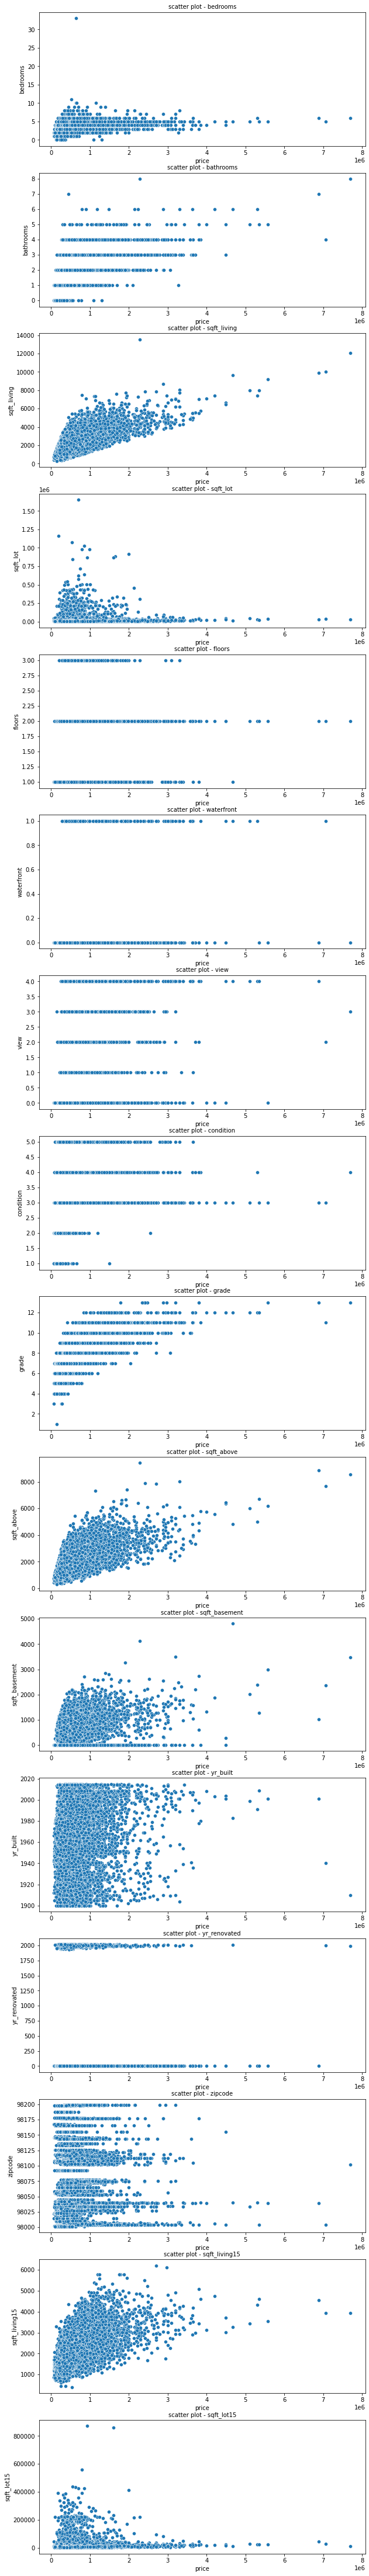

In [29]:
# Scatter plot
house1 = house.drop(['price'], axis = 1)
col_names = house1.columns

fig, ax = plt.subplots(len(col_names), figsize= (10,80)) 

for i, col in enumerate(col_names):
  sns.scatterplot(x = house.price ,y = house1[col], ax= ax[i])
  ax[i].set_title('scatter plot - {}'.format(col), fontsize= 10)

plt.show()

the sqft living and sqft living 15 appear to have a strong influence on price of the house.

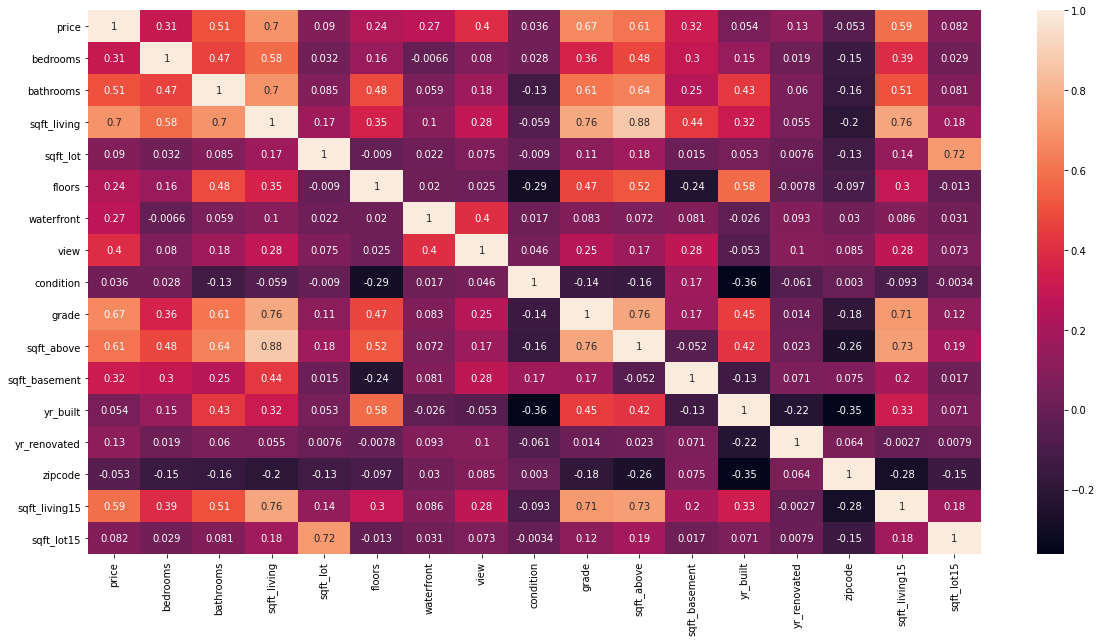

In [30]:
# Creating a heat map to view correlation of variable
plt.figure(figsize=(20,10))
sns.heatmap(house.corr(), annot= True)

The heat map shows that bathrooms, sqftliving, sqftliving15, grade, and sqftabove have a strong influence on the price of the house, with a strong correlation of greater than 0.5.

## Modelling

**Multiple linear regression**

In [31]:
# Testing for multicollinearity
# Let's display the correlations between the variables
correlations = house.corr()

correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.510082,0.702044,0.089655,0.237207,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.585374,0.082456
bedrooms,0.308338,1.000000,0.467452,0.576671,0.031703,0.155643,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,0.391638,0.029244
bathrooms,0.510082,0.467452,1.000000,0.697875,0.085310,0.484822,0.058798,0.177257,-0.126016,0.606631,0.639933,0.250880,0.433647,0.060436,-0.159773,0.510049,0.080779
sqft_living,0.702044,0.576671,0.697875,1.000000,0.172826,0.353321,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.085310,0.172826,1.000000,-0.008951,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,0.144608,0.718557
floors,0.237207,0.155643,0.484822,0.353321,-0.008951,1.000000,0.019640,0.024658,-0.293173,0.472608,0.517913,-0.235836,0.578619,-0.007775,-0.096743,0.296561,-0.013252
waterfront,0.266331,-0.006582,0.058798,0.103818,0.021604,0.019640,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,0.086463,0.030703
view,0.397346,0.079532,0.177257,0.284611,0.074710,0.024658,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.280439,0.072575
condition,0.036392,0.028472,-0.126016,-0.058753,-0.008958,-0.293173,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.092824,-0.003406
grade,0.667463,0.356967,0.606631,0.762704,0.113621,0.472608,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.713202,0.119248


The tabe above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable.

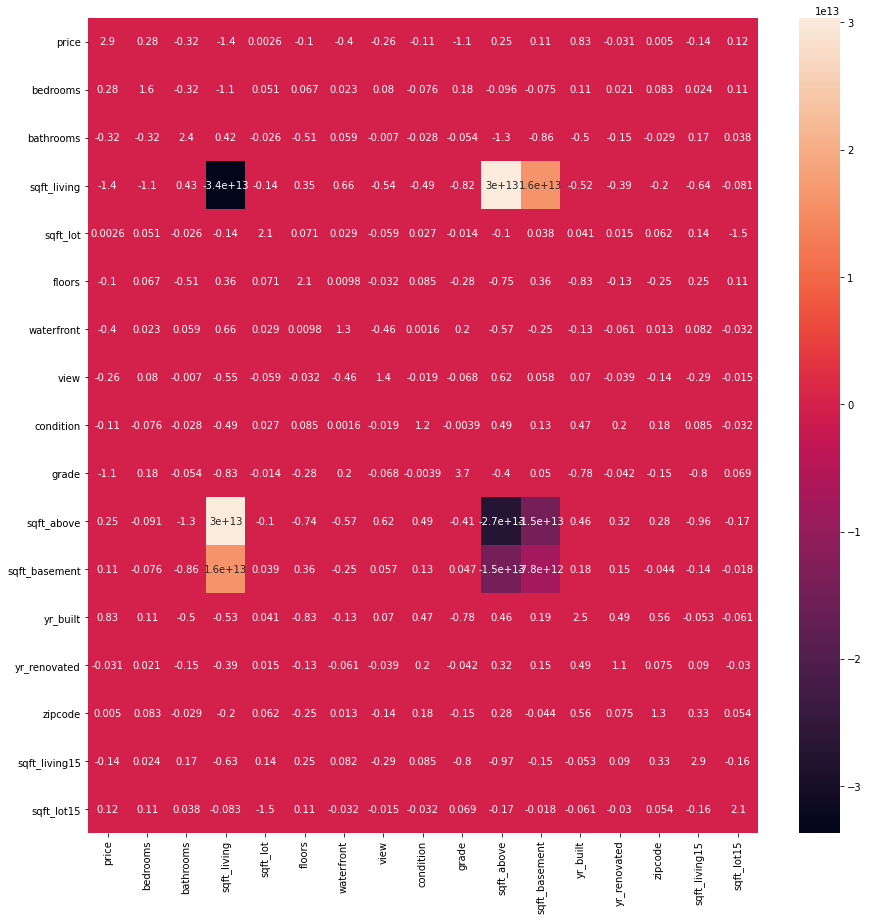

In [32]:
# Creating a new dataframe with the inverse of the matrix above.
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)

the sqft basement,the sqftbove and sqftliving have high variance factors.

In [33]:
model_data = house.drop(['sqft_above','sqft_basement'], axis=1)
correlations = model_data.corr()

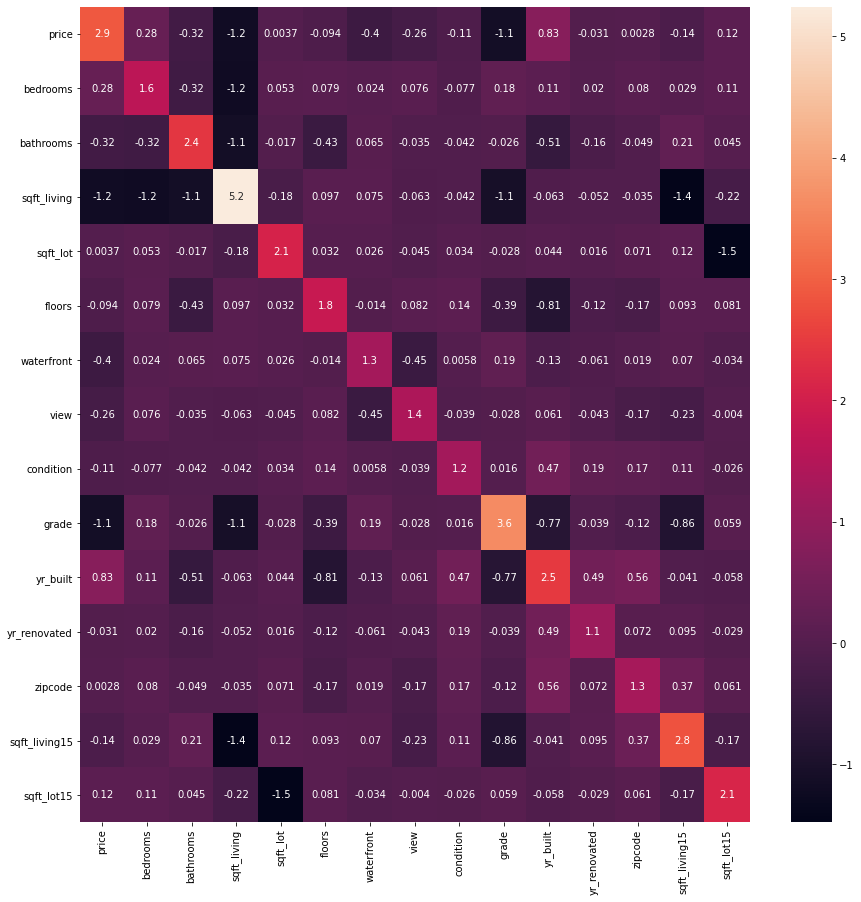

In [34]:
# Check the variance inflation factor
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)

The sqftliving shows moderate correlation. We will not drop the column however because it has a strong influence on the price.

**Creating the model**

In [35]:
# Defining our X and y variables
X = model_data.drop(['price'],axis = 1)
y = model_data['price']

In [36]:
# Train using 80% of the data.
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train_ml, y_train_ml)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#  check the coefficients used by our model, as they indicate how heavily each independent variable contributes to the dependent variable
regressor.coef_

array([-3.70073857e+04,  5.46130737e+04,  1.63213165e+02,  1.77152242e-02,
        2.37337001e+04,  6.03030422e+05,  4.34556679e+04,  2.12175780e+04,
        1.17672468e+05, -3.56158876e+03,  9.49298569e+00,  3.10215435e+01,
        2.77408349e+01, -6.00372588e-01])

In [38]:
# compare our predicted results to the actual data from the test set

y_pred_ml = regressor.predict(X_test_ml)

comparison_frame = pd.DataFrame({'Actual': y_test_ml, 'Predicted': y_pred_ml})

comparison_frame.describe()

,Actual,Predicted
count,4.323000e+03,4.323000e+03
mean,5.293396e+05,5.351716e+05
std,3.451267e+05,2.900489e+05
min,8.900000e+04,-4.109323e+05
25%,3.170000e+05,3.342053e+05
50%,4.400000e+05,4.706852e+05
75%,6.317500e+05,6.720678e+05
max,5.570000e+06,2.367338e+06


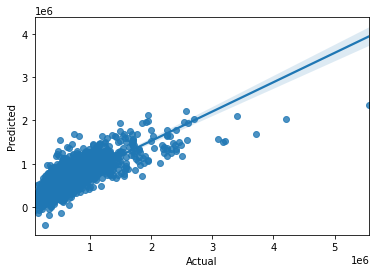

In [39]:
sns.regplot(comparison_frame.Actual, comparison_frame.Predicted)

Except for the extreme outliers, the predictions appear to be adequate for the majority of the data.

In [40]:
# Evaluating our model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ml, y_pred_ml))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ml, y_pred_ml))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ml, y_pred_ml)))
print('R score:', r2_score(y_test_ml, y_pred_ml))

Mean Absolute Error: 135981.78936193843
Mean Squared Error: 42130659941.212425
Root Mean Squared Error: 205257.54539410342
R score: 0.6462132993445318


In [41]:
# calculate percentage of rmse to mean of price
rmse = np.sqrt(metrics.mean_squared_error(y_test_ml, y_pred_ml))
percent = (rmse / model_data.price.mean()) * 100
percent

37.99783870178464

This will serve as the foundation for comparing the baseline models of the other regression models.

This model is not very accurate because the RMSE to mean percentage is ~ 38%



**Ridge regression**

In [42]:
# Defining our X and y variables
X = model_data.drop(['price'],axis = 1)
y = model_data['price']

In [43]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
# creating our ridge model and indicating normalization in order to get better estimates.
ridge = Ridge(normalize=True)
# setting up the grid that we will use. 
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [45]:
# fitting our model with the ridge information and finding the mean squared error below
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
RMSE = (np.sqrt(mean_squared_error(y_true=y,y_pred=ridge.predict(X))))
print('RMSE :',RMSE)

RMSE : 215580.78509160728


In [46]:
# Making Predictions

y_pred = ridge.predict(X_test)

Ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

Ridge.describe()

,Actual,Predicted
count,4.323000e+03,4.323000e+03
mean,5.293396e+05,5.341128e+05
std,3.451267e+05,2.861351e+05
min,8.900000e+04,-3.927285e+05
25%,3.170000e+05,3.356644e+05
50%,4.400000e+05,4.695069e+05
75%,6.317500e+05,6.694548e+05
max,5.570000e+06,2.327474e+06


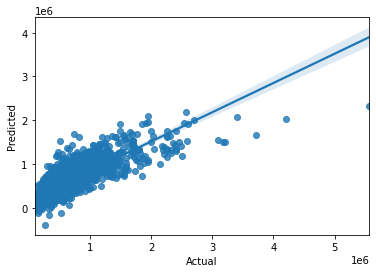

In [47]:
sns.regplot(Ridge.Actual, Ridge.Predicted)

In [48]:
print('R score:', r2_score(y_test, y_pred))

R score: 0.6476752500423879


In [49]:
# calculate percentage of rmse to mean of price
percent = (RMSE/ model_data.price.mean()) * 100
percent

39.90890509475184

In this model, the percentage of RMSE to mean is ~ 40%. This is significantly worse than our baseline model.

This could be explained by poor features. The features we utilized may not have had a strong enough correlation with the values we were attempting to predict.

In addition, these results indicate that there is little difference between the ridge and baseline model.

**Lasso Regression**

In [50]:
# Defining our X and y variables
X = model_data.drop(['price'],axis = 1)
y = model_data['price']

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
# Scaling data 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [52]:
# Creating lasso object
from sklearn import linear_model
lasso = linear_model.Lasso() 

In [53]:
# Fitting the models
lasso.fit(X, y) 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
# Making Predictions

y_pred = lasso.predict(X_test)

lasso_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

lasso_df.describe()

,Actual,Predicted
count,4.323000e+03,4.323000e+03
mean,5.293396e+05,-9.286057e+07
std,3.451267e+05,3.903154e+08
min,8.900000e+04,-6.471462e+09
25%,3.170000e+05,-1.345032e+08
50%,4.400000e+05,-5.091849e+07
75%,6.317500e+05,3.768661e+07
max,5.570000e+06,7.963962e+08


In [55]:
# Print scores, MSE, and coefficients
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso RMSE:",np.sqrt(mean_squared_error(y, lasso.predict(X))))
print("lasso coef:", lasso.coef_) 

lasso score: 0.655693975701001
lasso MSE: 46463672807.27719
lasso RMSE: 215554.33840977823
lasso coef: [ -35845.23944257   40212.46175273  147646.49738856    -465.14369409
   11827.69277574   50225.00579435   33451.89350138   13575.72168238
  141028.62424463 -104674.00960598    3911.19294437    -347.53550102
   17211.71669866  -15027.65484763]


In [56]:
# calculate percentage of rmse to mean of price
rmse_lasso = np.sqrt(mean_squared_error(y, lasso.predict(X)))
percent = (rmse_lasso/ model_data.price.mean()) * 100
percent

39.9040092126131

The above lasso model was training the whole dataset with an alpha of 1.

In [57]:
# building Lasso, and choosing the regularization parameter with the help of GridSearch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

In [58]:
# Fitting model
gridlasso.fit(X_train, y_train) 
# printing the models evaluation values
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6464450726934727
lasso MSE: 47028295241.59014
lasso best estimator coef: [ -32642.7827934    37100.84828953  145533.56259074    1186.23087168
   12827.20167151   52842.26942013   31981.8292936    14752.30611051
  138435.6035082  -102747.99345019    4738.58051433    2791.9756366
   21608.25690233  -15700.14414021]


In [59]:
# Getting RMSE 
rmsel = np.sqrt(mean_squared_error(y_test, gridlasso.predict(X_test)))
print('lasso RMSE:',rmsel)
# percentage of rmse to mean
percent = (rmsel/ model_data.price.mean()) * 100
print(percent)

lasso RMSE: 216860.0821764811
40.14573207321621


In this model, the percentage of RMSE to mean is 40%. This is significantly worse than our baseline model and ~ similar to our ridge model.

This could be explained by poor features. The features we utilized may not have had a strong enough correlation with the values we were attempting to predict.

In addition, these results indicate that there is little difference between the lasso, ridge and baseline model.

**ElasticNet Regression**

In [60]:
# Defining our X and y variables
X = model_data.drop(['price'],axis = 1)
y = model_data['price']

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
# Elastic Net Model
elastic=ElasticNet(normalize=True)
# creating our grid.
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [62]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
search.fit(X,y)



GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [63]:
# print best alpha
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [64]:
# best score
abs(search.best_score_)

47195247430.556274

In [65]:
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(model)

46636585202.26581


In [66]:
# Getting RMSE 
rmse2 = np.sqrt(mean_squared_error(y_test, elastic.predict(X_test)))
print('RMSE:',rmse2)
# percentage of rmse to mean
percent = (rmse2/ model_data.price.mean()) * 100
print(percent)

RMSE: 205153.43026947754
37.97856462489575


The Elastic net regression model performed better than the lasso and ridge models but similar to the baseline model.

**Quantile regression**

In [67]:
from sklearn.preprocessing import MinMaxScaler
model_data = house.drop(['zipcode','yr_built','yr_renovated','sqft_living15','sqft_lot15', 'sqft_above','sqft_basement'], axis=1)
X = model_data.drop('price', axis=1)
Y = model_data['price']

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=45)


In [68]:
#Scale features
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [69]:
x_frame = pd.DataFrame(x_train, columns=X.columns)
y_frame = pd.DataFrame({'y': y_train})

x_frame.index =  pd.RangeIndex(len(x_frame.index))
y_frame.index = pd.RangeIndex(len(y_frame.index))

data = pd.concat([x_frame, y_frame], axis=1)

In [70]:
# define quantiles
import statsmodels.formula.api as smf
quantiles = np.arange(0.1, 1.0, 0.1)
mod = smf.quantreg('y ~ bedrooms + bathrooms +	sqft_living	+ sqft_lot +	floors +	waterfront +	view +	condition +	grade', data)

for qt in quantiles:
  res = mod.fit(qt)
  print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2328
Model:                       QuantReg   Bandwidth:                   2.802e+04
Method:                 Least Squares   Sparsity:                    4.644e+05
Date:                Sat, 24 Jul 2021   No. Observations:                15129
Time:                        08:03:51   Df Residuals:                    15119
                                        Df Model:                            9
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.005e+05   7489.270    -13.424      0.000   -1.15e+05   -8.59e+04
bedrooms    -5.316e+05   4.64e+04    -11.467      0.000   -6.22e+05   -4.41e+05
bathrooms    9.464e+04   1.31e+04      7.209      0.000    6.89e+04     1.2e+05
sqft_living  7.246e+05   2.29e+04     31.623   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3375
Model:                       QuantReg   Bandwidth:                   3.039e+04
Method:                 Least Squares   Sparsity:                    3.839e+05
Date:                Sat, 24 Jul 2021   No. Observations:                15129
Time:                        08:03:59   Df Residuals:                    15119
                                        Df Model:                            9
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.967e+05   1.15e+04    -17.119      0.000   -2.19e+05   -1.74e+05
bedrooms    -9.626e+05   6.97e+04    -13.818      0.000    -1.1e+06   -8.26e+05
bathrooms    6.463e+04   1.93e+04      3.347      0.001    2.68e+04    1.02e+05
sqft_living  1.253e+06   3.28e+04     38.251   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3636
Model:                       QuantReg   Bandwidth:                   2.964e+04
Method:                 Least Squares   Sparsity:                    4.023e+05
Date:                Sat, 24 Jul 2021   No. Observations:                15129
Time:                        08:04:02   Df Residuals:                    15119
                                        Df Model:                            9
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.794e+05   1.23e+04    -14.584      0.000   -2.04e+05   -1.55e+05
bedrooms    -9.574e+05   7.52e+04    -12.736      0.000    -1.1e+06    -8.1e+05
bathrooms    6.806e+04   2.01e+04      3.387      0.001    2.87e+04    1.07e+05
sqft_living  1.341e+06   3.42e+04     39.173   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3878
Model:                       QuantReg   Bandwidth:                   2.803e+04
Method:                 Least Squares   Sparsity:                    4.605e+05
Date:                Sat, 24 Jul 2021   No. Observations:                15129
Time:                        08:04:04   Df Residuals:                    15119
                                        Df Model:                            9
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.787e+05   1.39e+04    -12.824      0.000   -2.06e+05   -1.51e+05
bedrooms    -1.008e+06    8.6e+04    -11.715      0.000   -1.18e+06   -8.39e+05
bathrooms    7.304e+04   2.19e+04      3.334      0.001    3.01e+04    1.16e+05
sqft_living  1.466e+06   3.78e+04     38.736   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4150
Model:                       QuantReg   Bandwidth:                   2.728e+04
Method:                 Least Squares   Sparsity:                    6.768e+05
Date:                Sat, 24 Jul 2021   No. Observations:                15129
Time:                        08:04:07   Df Residuals:                    15119
                                        Df Model:                            9
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.494e+05   1.91e+04     -7.812      0.000   -1.87e+05   -1.12e+05
bedrooms    -1.215e+06   1.21e+05    -10.038      0.000   -1.45e+06   -9.78e+05
bathrooms    4.868e+04   2.86e+04      1.700      0.089   -7452.920    1.05e+05
sqft_living   1.77e+06   5.09e+04     34.807   

In [71]:
# get predictions for the .3 percentile
mod_30 = smf.quantreg('y ~ bedrooms + bathrooms +	sqft_living	+ sqft_lot +	floors +	waterfront +	view +	condition +	grade', data)
res = mod_30.fit(.3)

parameters_30 = [res.params[x] for x in X.columns]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [72]:
x_test_30 = pd.DataFrame(x_test, columns=X.columns)
x_test_30.index =  pd.RangeIndex(len(x_test_30.index))

In [73]:
for i, col in enumerate(X.columns.to_list()):
  x_test_30[col] = parameters_30[i] * x_test_30[col]

In [74]:
x_test_30['y_pred'] = x_test_30.sum(axis=1)


In [75]:
# get the rmse score
np.sqrt(mean_squared_error(y_test, x_test_30['y_pred'].values))

266127.46333128045

The rmse score for the 30th percentile is higher than that of the multiple linear regression as well as that of the ridge and lasso regressors

### HETEROSCEDASTICITY USING BARTLETT'S TEST

In [76]:
# checking for heteroskedasticity to help determine which model to use, and perform hyperparameter tuning on it to achieve better results. 
residuals = np.subtract(y_pred_ml, y_test_ml)
pd.DataFrame(residuals).describe()

,price
count,4.323000e+03
mean,5.831921e+03
std,2.051984e+05
min,-3.202662e+06
25%,-8.382690e+04
50%,1.255040e+04
75%,1.108053e+05
max,1.050135e+06


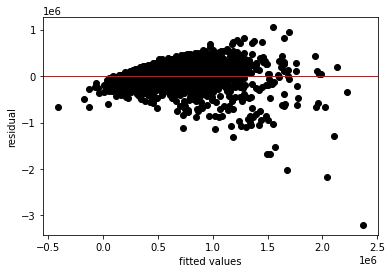

In [77]:
plt.scatter(y_pred_ml, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

# The data is showing possibility of heteroskedasticity

In [78]:
import scipy as sp
# Using bartlett's test
test_result, p_value = sp.stats.bartlett(y_pred_ml, residuals)

# To interpret the results we must compare to a p_value of 0.05

print(p_value)

if (p_value < 0.05):
  print('the variances are unequal,heteroskedasicity is present')
else:
  print('the variances are homogeneous!')

2.158175701992737e-112
the variances are unequal,heteroskedasicity is present


**Hyperparameter tuning**

In [79]:
# We will use Lasso regression for hyperparameter tuning
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoCV

In [80]:
# Defining our X and y variables
X = model_data.drop(['price'],axis = 1)
y = model_data['price']

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
preprocessor = StandardScaler()
preprocessor.fit(X)

def func(x):
  return np.log(x)
def inverse_func(x):
  return np.exp(x)

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=LassoCV(alphas=np.logspace(-10, 10, 21), max_iter=100000),
        func=func,
        inverse_func=inverse_func
    )
)

model.fit(X_train, y_train)

# First we verify which value of alpha has been selected.
model[-1].regressor_.alpha_

0.0001

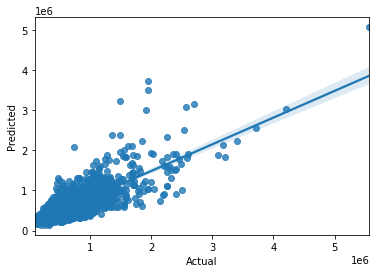

In [82]:
y_pred = model.predict(X_test)

df_ = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

sns.regplot(df_.Actual, df_.Predicted)

Most of our predicted values seem closer to the actual values but not all.

In [83]:
# Evaluating the model

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

ratio= (rmse3/ model_data.price.mean()) * 100
#r2_score = r2_score(y_test, y_pred)

print('Root Mean Squared Error:', rmse3)
print('Percentage of RMSE to mean is: ' +str(ratio) + ' %')
#print('R score:', r2_score)

Root Mean Squared Error: 204896.49497354444
Percentage of RMSE to mean is: 37.93100005954486 %


The above model outperformed ridge and lasso, although it was very close to our baseline and elastic net regression.

## Conclusion


We can see from the preceding analysis and prediction algorithms that our models had nearly identical accuracy, with little variance across the score percentages.

There's still space for improvement by gathering more data to describe some of the variance that the model doesn't account for.

We did have the right data as home prices are significant because purchasing a home is the most expensive single purchase most people make in their lives, and home ownership is a major aspiration for many individuals.